# Environment conda3--python3
## Coding UTF-8
### Import Libraries

In [1]:
# turn off feature warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# show library versions for documentation reference
import sys
print("Python: {}".format(sys.version))
print("pandas: {}".format(pd.__version__))
print("numpy: {}".format(np.__version__))

Python: 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
pandas: 1.0.3
numpy: 1.18.1


### Load House Cleaned Dataset (CSV)

In [2]:
df_house = pd.read_csv(r'C:\Users\OS\Desktop\Model Improvement Dataset\df_cleaned_house_model_001-09-2020.csv')

### Show --House_Dataset

In [3]:
df_house

,PropertyType_n,SellPrice,CostestimateB,MarketPrice,HouseArea,Floor,HomeCondition_n,BuildingAge,RoadType_n,AsseStatus_n,UserType_n
0,1,2990000,0,0,140.0,1,2,1,1,2,0
1,1,9000000,9200000,9120000,230.0,3,3,13,1,0,0
2,1,8300000,8300000,8300000,256.0,2,2,6,3,0,0
3,1,27000000,30000000,20000000,1600.0,3,2,20,1,2,0
4,1,6790000,5000000,6520000,250.0,1,3,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
405,1,2000000,3000000,4000000,129.0,1,2,11,2,0,1
406,2,2000000,2100000,2300000,240.0,2,3,7,1,3,1
407,2,2000000,1900000,2400000,76.8,4,2,13,1,0,1
408,2,6900000,7000000,7000000,56.0,3,2,16,0,3,1


#### Prepare Data & Target Value for Model Training 

In [4]:
# seperate train data and target data
df_train_house = df_house.drop('UserType_n', axis='columns')
target_house = df_house['UserType_n']

In [5]:
df_train_house

,PropertyType_n,SellPrice,CostestimateB,MarketPrice,HouseArea,Floor,HomeCondition_n,BuildingAge,RoadType_n,AsseStatus_n
0,1,2990000,0,0,140.0,1,2,1,1,2
1,1,9000000,9200000,9120000,230.0,3,3,13,1,0
2,1,8300000,8300000,8300000,256.0,2,2,6,3,0
3,1,27000000,30000000,20000000,1600.0,3,2,20,1,2
4,1,6790000,5000000,6520000,250.0,1,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...
405,1,2000000,3000000,4000000,129.0,1,2,11,2,0
406,2,2000000,2100000,2300000,240.0,2,3,7,1,3
407,2,2000000,1900000,2400000,76.8,4,2,13,1,0
408,2,6900000,7000000,7000000,56.0,3,2,16,0,3


In [6]:
target_house

0      0
1      0
2      0
3      0
4      0
      ..
405    1
406    1
407    1
408    1
409    1
Name: UserType_n, Length: 410, dtype: int64

### Decision Tree Clasifier (House)

In [7]:
from sklearn.tree import DecisionTreeClassifier
import sklearn
print(sklearn.__version__)

0.22.1


#### Data Slicing
##### Split Dataset into Train and Test

In [8]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
XH = df_train_house
YH = target_house
XH_train, XH_test, YH_train, YH_test = train_test_split(XH, YH, test_size=0.3)

In [9]:
XH_train.shape, YH_train.shape

((287, 10), (287,))

In [10]:
XH_test.shape, YH_test.shape

((123, 10), (123,))

#### Train Dataset
##### Gini Index = a metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with lower gini index should be preferred.

In [11]:
# Classifier Object
clf_giniHouse = DecisionTreeClassifier(splitter='best')

In [12]:
# Perform Training 
clf_giniHouse.fit(XH_train, YH_train)
clf_giniHouse

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### View Decision Tree Model

In [13]:
from sklearn import tree

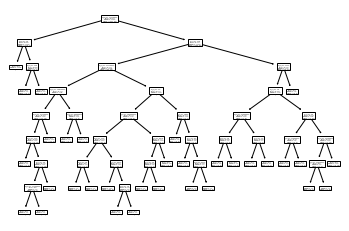

In [14]:
view_model_tree = tree.plot_tree(clf_giniHouse.fit(XH_train, YH_train))

#### Show & Export Graph

In [15]:
import graphviz 
dot_data = tree.export_graphviz(clf_giniHouse, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("house")

'house.pdf'

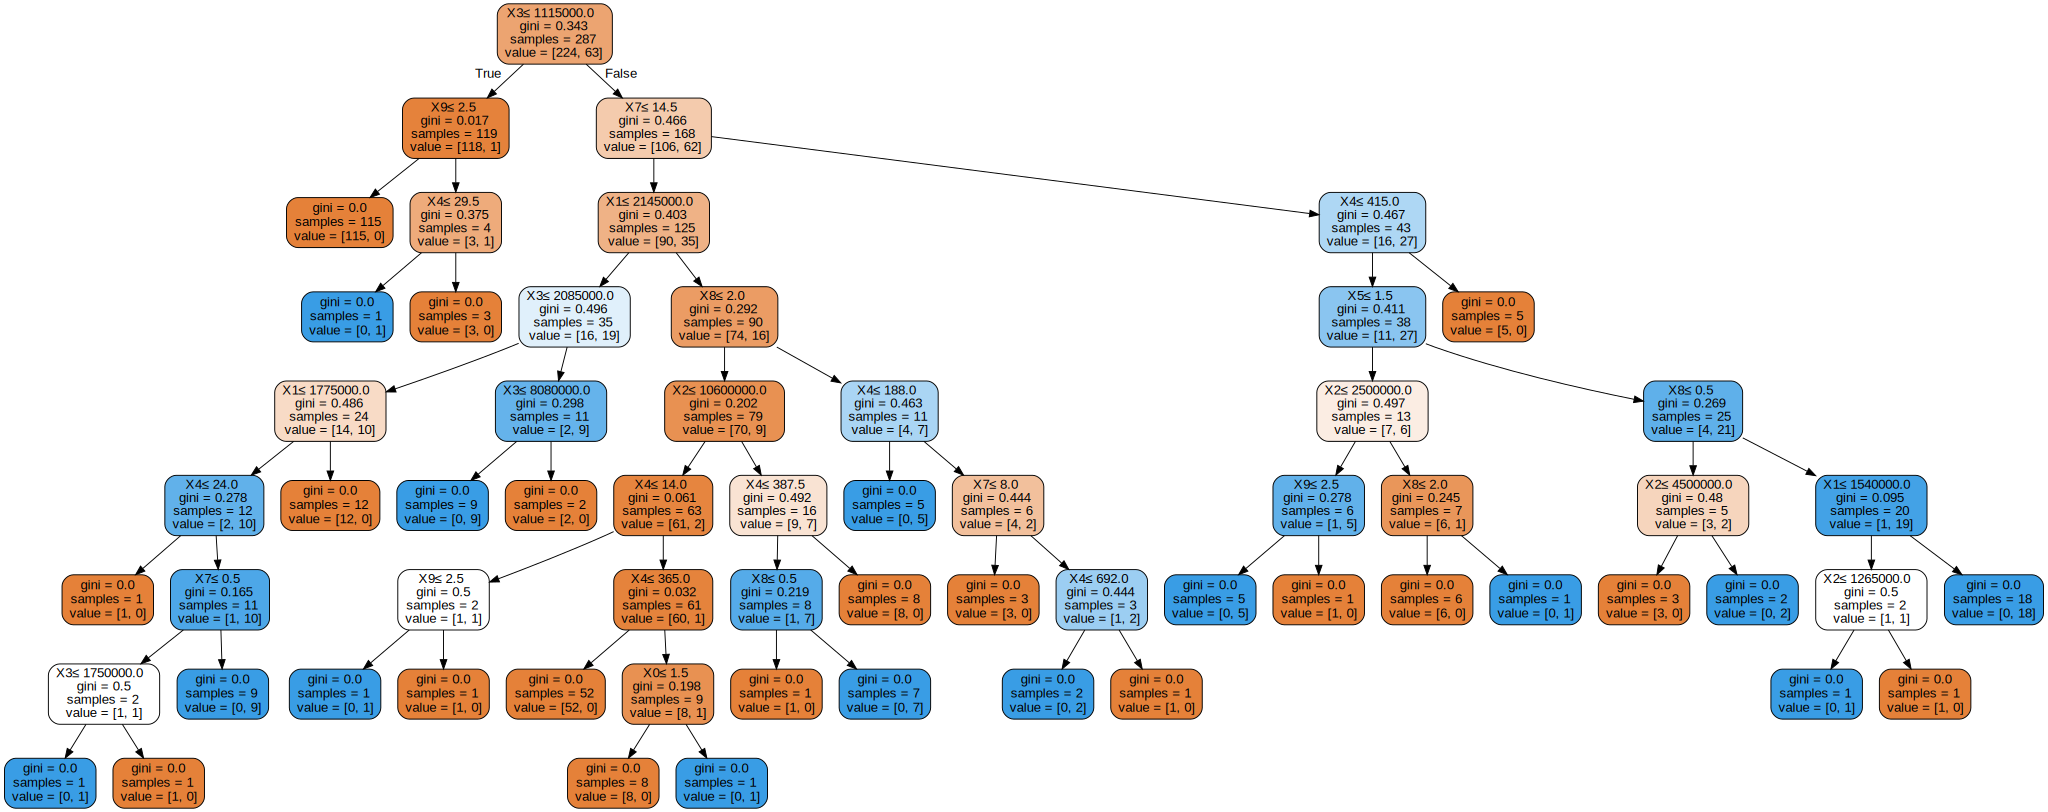

In [16]:
dot_data = tree.export_graphviz(clf_giniHouse, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### Prediction & Accuracy
##### Prediction using Gini

In [17]:
# Predicton on test with giniIndex 
YHgini_pred = clf_giniHouse.predict(XH_test) 
print("Predicted values:") 
YHgini_pred

Predicted values:


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

#### Calculate Accuracy

In [18]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

###### Confusion Matrix = a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
###### Accuracy = (TP + TN) / (TP + TN + FP + FN); True Positive (TP) : Observation is positive, and is predicted to be positive. False Negative (FN) : Observation is positive, but is predicted negative. True Negative (TN) : Observation is negative, and is predicted to be negative. False Positive (FP) : Observation is negative, but is predicted positive.
###### Precision = TP / (TP + TN) High Precision indicates an example labelled as positive is indeed positive (a small number of FP). Recall = TP / (TP + FN)  High Recall indicates the class is correctly recognized (a small number of FN). 
###### f1-score = (2*Recall*Precision) / (Recall + Precision) Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall.
###### High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives. 
###### Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP) 
###### Support = amount of elements/target (in this case the amount of UserType)

### Gini Accuracy

In [19]:
print("Confusion Matrix: ", confusion_matrix(YH_test, YHgini_pred))
# Confusion Matrix = a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 
#                   It shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.
#                                                 Predicted: No    Predicted: Yes
#                       Actual: No         [      TN                  FP           ]
#                       Actual: Yes        [      FN                  TP           ]

print ("Accuracy : ", accuracy_score(YH_test, YHgini_pred)*100)
# Accuracy = (TP + TN) / (TP + TN + FP + FN); 
# True Positive (TP) : Observation is positive, and is predicted to be positive. 
# False Negative (FN) : Observation is positive, but is predicted negative. 
# True Negative (TN) : Observation is negative, and is predicted to be negative. 
# False Positive (FP) : Observation is negative, but is predicted positive.

print("Report : ", classification_report(YH_test, YHgini_pred))
# Precision = TP/ (TP + TN) High Precision indicates an example labelled as positive is indeed positive (a small number of FP). 
# Recall = TP / (TP + FN)  High Recall indicates the class is correctly recognized (a small number of FN). 
## f1-score = (2*Recall*Precision) / (Recall + Precision) Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. 
##            We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall.
## High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives. 
## Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP) 
## Support = amount of elements/target (in this case the amount of UserType)


Confusion Matrix:  [[101   5]
 [  3  14]]
Accuracy :  93.4959349593496
Report :                precision    recall  f1-score   support

           0       0.97      0.95      0.96       106
           1       0.74      0.82      0.78        17

    accuracy                           0.93       123
   macro avg       0.85      0.89      0.87       123
weighted avg       0.94      0.93      0.94       123



### Plot Validation Curve

In [20]:
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve

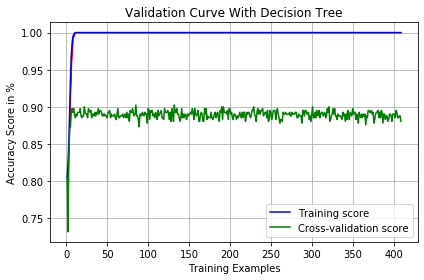

In [21]:
X = df_train_house
y = target_house

size = 410
cv = KFold(size, shuffle=True)

# Create range of values for parameter
param_range = np.arange(0, 410)



# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(clf_giniHouse,
                                             X,
                                             y,
                                             param_name="max_depth",
                                             param_range=param_range,
                                             cv=cv, 
                                             scoring="accuracy", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="red")
#plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="grey")

# box-like grid
plt.grid()

# Create plot
plt.title("Validation Curve With Decision Tree")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score in %")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Learning Curve

In [22]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [23]:
size = 200
cv = KFold(size, shuffle=True)

train_sizes, train_scores, valid_scores = learning_curve(clf_giniHouse,
                                                         X,
                                                         y,
                                                         train_sizes=np.linspace(.1, 1.0, 5),
                                                         cv=cv,
                                                         n_jobs=-1)
train_sizes

array([ 40, 132, 223, 315, 407])

In [24]:
train_scores

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.,

In [25]:
valid_scores

array([[1.        , 0.66666667, 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.66666667, 0.66666667, 0.66666667,
        1.        , 0.5       , 1.        , 1.        , 0.5       ,
        0.5       , 0.5       , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.5       , 1.        ,
        1.        , 0.5       , 1.        , 0.5       , 1.        ,
        1.        , 0.5       , 1.        , 1.        , 1.        ,
        0.5       , 0.5       , 1.        , 1.        , 0.5       ,
        1.        , 0.5       , 0.5       , 1.        , 0.5       ,
        0.5       , 0.5       , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.5       , 1.        , 0.5       , 0.5       , 1.        ,
        1.        , 1.        , 0.        , 1.  

Automatically created module for IPython interactive environment


No handles with labels found to put in legend.


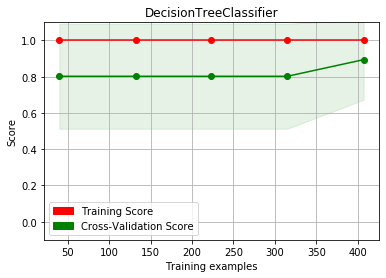

In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
    
clf_giniHouse.fit(X,y)
    
train_sizes, train_scores, test_scores = learning_curve(clf_giniHouse,
                                                        X, 
                                                        y, 
                                                        n_jobs=-1, 
                                                        cv=cv, 
                                                        train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
    
fig = plt.figure()
plt.title("DecisionTreeClassifier")
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.gca().invert_yaxis()
    
# box-like grid
plt.grid()
    
# plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1,
                 color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1,
                 color="g")
    
# plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean,'o-', color="red", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")
    
# define labels to put in legend
red_patch = mpatches.Patch(color='red', label='Training Score')
green_patch = mpatches.Patch(color='green', label='Cross-Validation Score')
plt.legend(handles=[red_patch, green_patch])
    
# sizes the window for readability and displays the plot
# shows error from 0 to 1.1
plt.ylim(-.1,1.1)
plt.show()

In [27]:
fig.savefig(r"C:\Users\OS\Desktop\Model Improvement Dataset\lerning curve_house.png", bbox_inches='tight', dpi=300)

#### Export Model with Pickle
##### House Model

In [28]:
import pickle

In [29]:
readdict_file = open('E:\Model\Model_Pickle_giniHouse_V04.pkl','wb')
    #to save the model into file
pickle.dump(clf_giniHouse, readdict_file)
readdict_file.close()

In [30]:
with open(r'E:\Model\Model_Pickle_giniHouse_V04', 'wb') as mlA:
    pickle.dump(clf_giniHouse,mlA)